(58, 1)


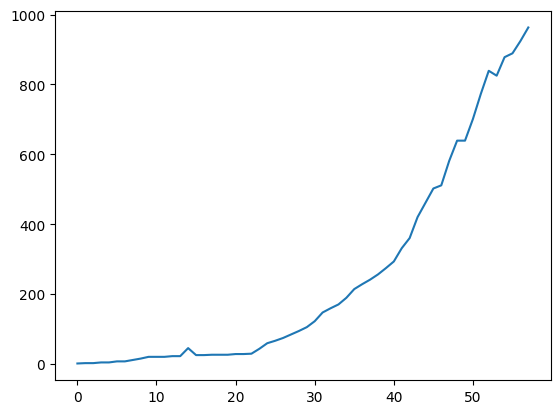

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pickle

data = pd.read_csv('time_series_covid_19_confirmed.csv')

datanew = data.drop(columns=['Province/State', 'Lat', 'Long'])
x = datanew.loc[datanew['Country/Region'] == 'Japan'].transpose().iloc[2:,:]
x = np.asanyarray(x)
plt.plot(x)

In [3]:
outputs=x[1:]
inputs=x[:-1]

# Creamos el objeto para realizar la regresion lineal
lin_reg = MLPRegressor()

# Entrenamos con nuestros datos de entrada y salida
lin_reg.fit(inputs, outputs.ravel())
print(lin_reg.score(inputs, outputs))

# Predicción
y_new = lin_reg.predict([[45]])

# Guardar el modelo
# filename = 'covidModel.pkl'
# pickle.dump(lin_reg, open(filename, 'wb'))

0.9963009714092786


In [16]:
listInputs = []
listOutputs = []
valoresAnteriores = 15
for i in range(valoresAnteriores,len(x)):
    entrada = np.reshape(x[i-valoresAnteriores:i],-1)
    listInputs.append(entrada)
    listOutputs.append(x[i])

listInputs = np.asanyarray(listInputs)
listOutputs = np.asanyarray(listOutputs).ravel()
lin_reg.fit(listInputs, listOutputs)

print(lin_reg.score(listInputs, listOutputs))

y_test = [12,15,16,16,18,20,25,30,30,32,34,37,40,41,42]
y_new = lin_reg.predict([y_test])
print(y_new)

# filename = "covid" + str(valoresAnteriores) + "Model.pkl"
# pickle.dump(lin_reg, open(filename, 'wb'))

0.9283302613496381
[53.80442475]
